In [1]:
import pandas as pd
import numpy as np
import datetime
import json
from matplotlib import pyplot as plt
import os
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as colrs
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs
from shapely.geometry import shape as Shape
import numpy as np
from descartes.patch import PolygonPatch
import shutil
from shapely.geometry.polygon import Polygon
import geopandas as gpd
from sklearn.cluster import KMeans
from matplotlib.legend import Legend
import seaborn as sns

In [2]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

In [3]:
city_str = 'Mans'
app_str = 'Youtube' 

In [4]:
path =  f'./dataset/{city_str}/{app_str}/'

In [5]:
days = [
    d for d in os.listdir(path)
    if os.path.isdir(os.path.join(path, d)) and not d.startswith('.')
]

In [6]:
day = "20190317"

In [7]:
date = datetime.datetime.strptime(day, '%Y%m%d')
times = [date + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]
columns = ['tile_id'] + times_str

# Now i want to group all days in one dataframe

In [8]:
list_of_days_means = []

In [9]:
def fillna_with_row_mean(row):
    mean_value = row.mean()
    return row.fillna(mean_value)

In [10]:
dictionary_days = dict()

In [11]:
#get mean traffic of each day
for day in days:
    df_traffic_day = f'./dataset/{city_str}/{app_str}/{day}/{city_str}_{app_str}_{day}_DL.txt'
    df_day_means = pd.read_csv(df_traffic_day, sep=' ', names=columns)

    df_day = df_day_means.copy()
    tiles = df_day_means['tile_id']
    
    df_day_means.drop('tile_id',axis= 1, inplace = True)
    #check for null values
    if df_day_means.isna().any().any():
        print(df_traffic_day)
        df_day_means = df_day_means.apply(fillna_with_row_mean, axis=1)

    df_day['tile_id'] = tiles
    dictionary_days[day] = df_day
        
    df_day_means = df_day_means.mean()
    df_day_means['day'] = day
    list_of_days_means.append(df_day_means)

./dataset/Mans/Youtube/20190331/Mans_Youtube_20190331_DL.txt


In [12]:
df = pd.concat(list_of_days_means, axis=1).transpose()

# save all days in as csv files in folder

In [13]:
os.mkdir(path+'/all_days_in_csv')

In [14]:
for d_f in dictionary_days:
    dictionary_days[d_f].to_csv(path+'/all_days_in_csv/'+d_f+'.csv', index=False) 

# removing outliers

In [15]:
df.set_index('day',inplace = True)

In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
df_after_rm_outliers = df[~outliers]

In [17]:
df_outliers = df[outliers]

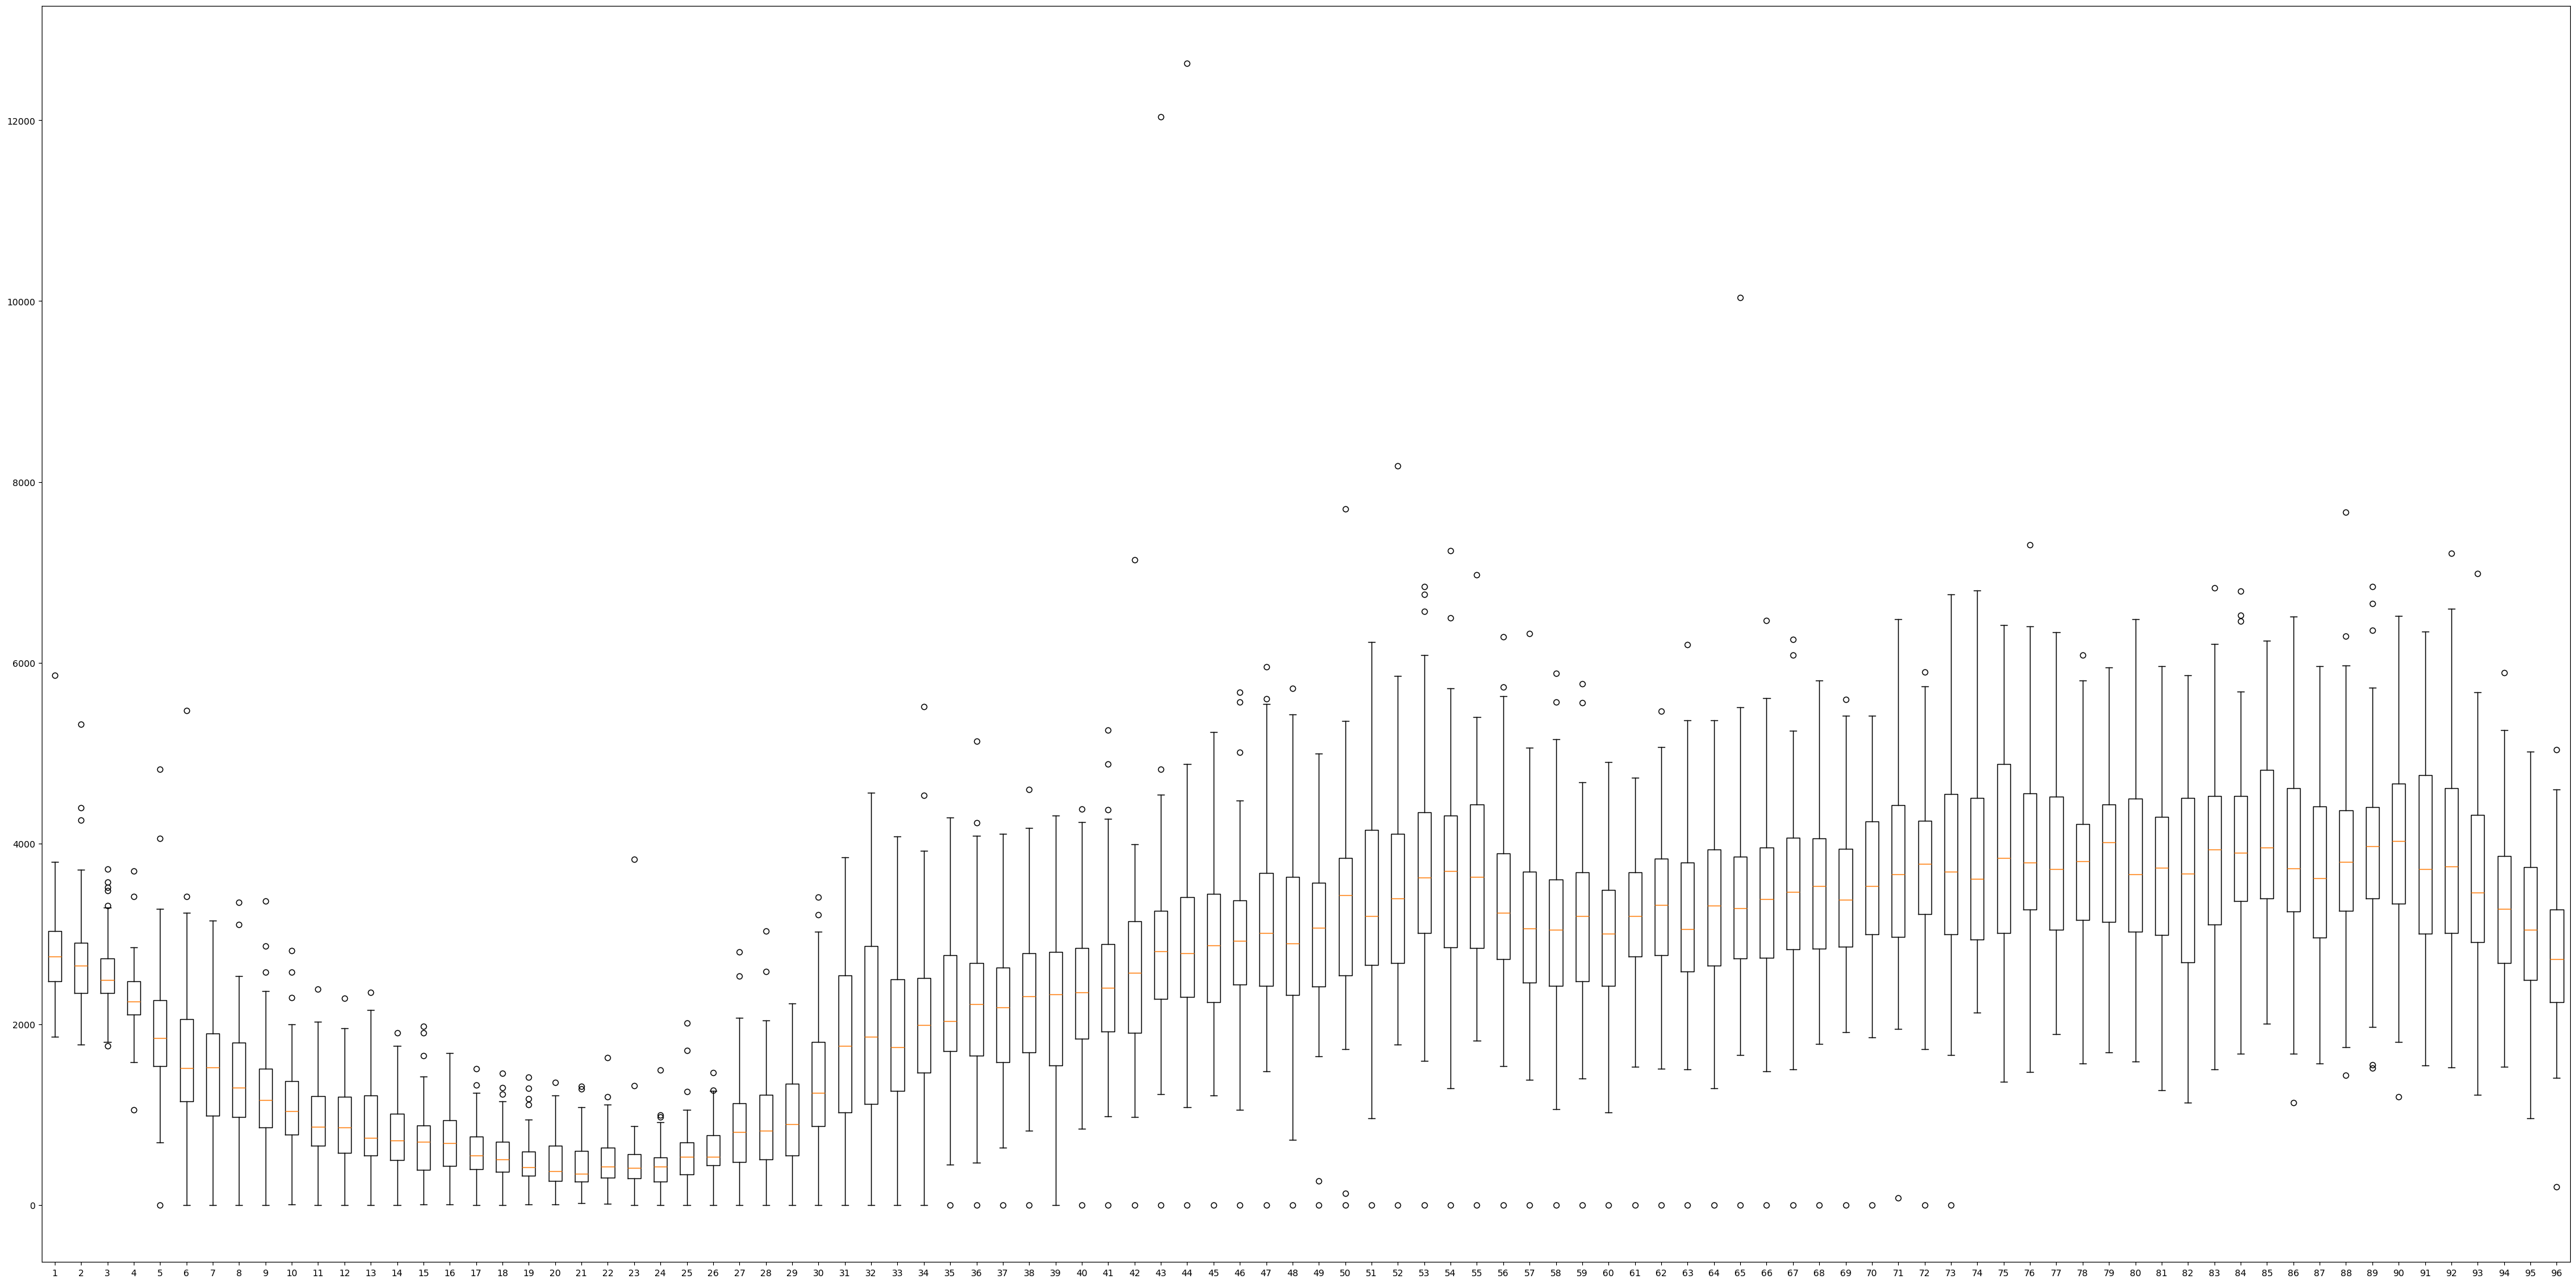

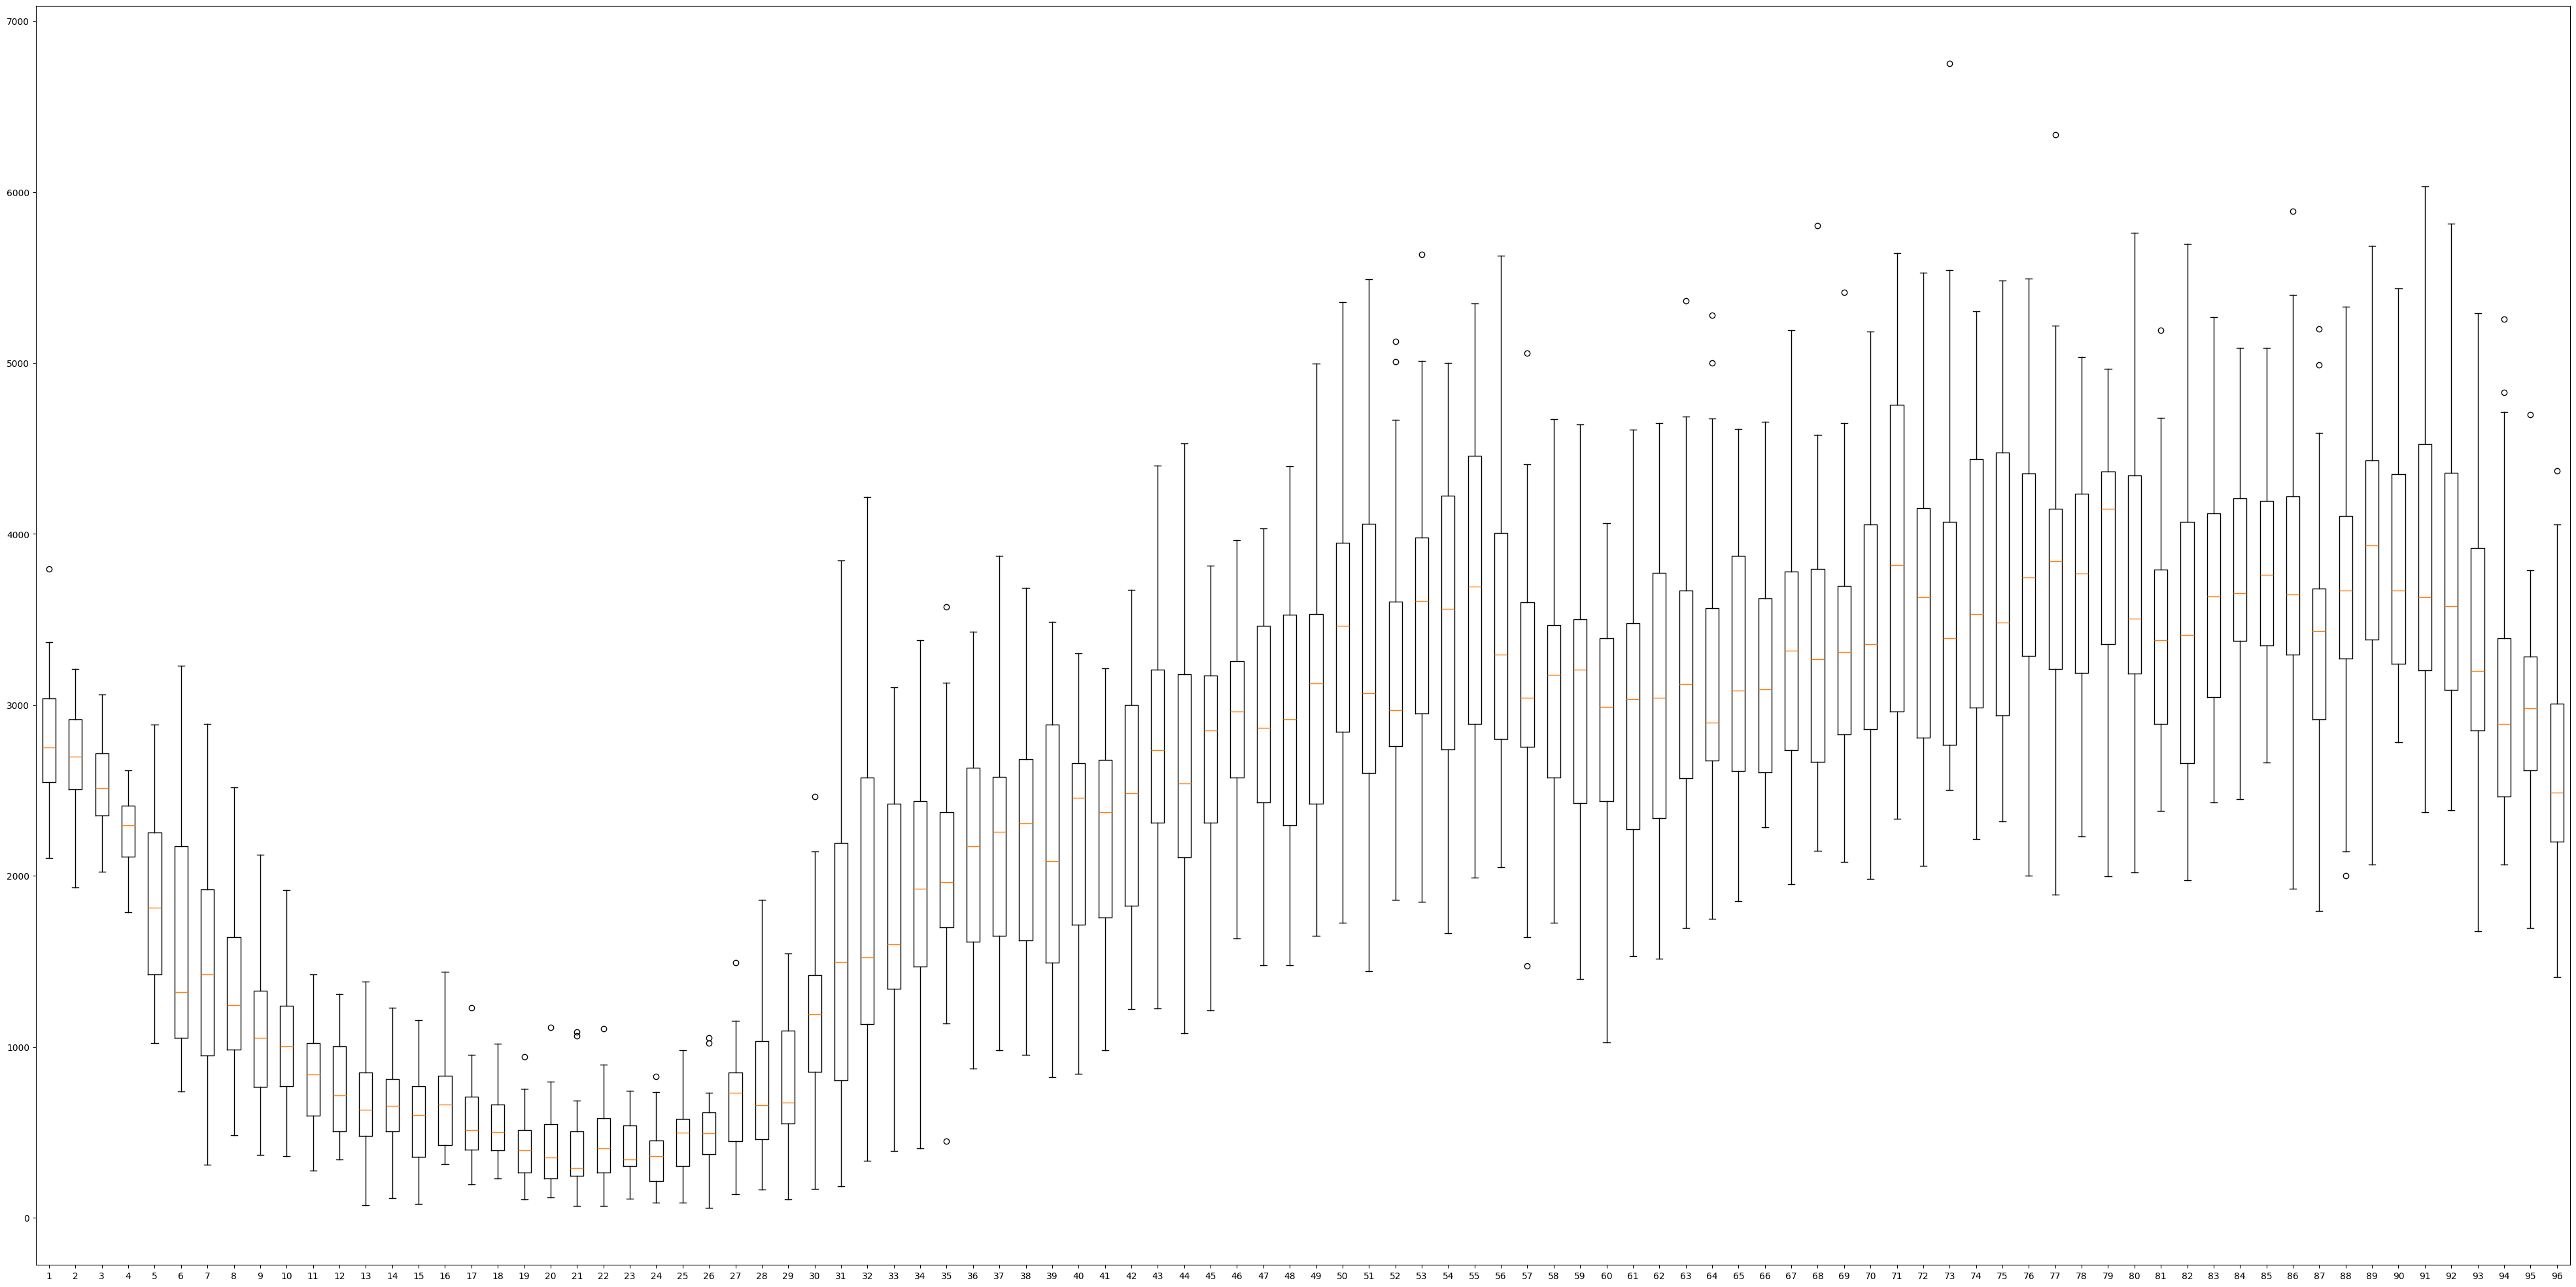

In [18]:
fig1 = plt.figure(figsize =(50, 25))
plt.boxplot(df)
plt.show()

fig2 = plt.figure(figsize =(50, 25))
plt.boxplot(df_after_rm_outliers)
plt.show()

# ------------------------------------------------------------------------------------------

In [19]:
df_after_rm_outliers.reset_index(drop=False, inplace=True)

In [20]:
df_outliers.reset_index(drop=False, inplace=True)

In [21]:
df_outliers

day        00:00        00:15        00:30        00:45        01:00  \
0   20190503  3212.461037  2954.793663  2626.487472  2375.608064  1824.906475   
1   20190330  3110.184966  2884.747049  3713.217692  2384.866711  2048.940318   
2   20190331   2532.30258  2497.662571  3314.264492  1846.038274  1742.952455   
3   20190415  1903.433337  1889.446182  2093.804423   1789.18195   779.373134   
4   20190424   2904.42496  2448.482594  2217.018914  2091.255147  1810.903347   
5   20190423  2612.241185  2731.052906  2757.525038  2747.236085   3275.17778   
6   20190422  2351.210395  2241.328121  2427.491269  2247.012286  2396.539186   
7   20190425  2920.281954  2785.729178  2422.738561  2110.275215  1637.231617   
8   20190407   2850.41528  3192.968949  3045.372166   2524.42388   1847.30809   
9   20190401  2259.478238  2143.428162  2457.963439  2130.584311  1630.627797   
10  20190322  1862.637217  1776.007484  1762.112067  1577.860121   1935.55568   
11  20190325  2581.367177  1905.514688  2375.076138  1582.563982  1985.487769   
12  20190527  3029.026583  2484.859004  2336.340035  2149.111434  2138.058565   
13  20190518  2838.253397  2735.550653  2714.089207  2440.608288  2327.292602   
14  20190529  2445.255222  2412.915522  2345.131018  2278.843218  2278.083473   
15  20190324  2990.815965  5315.830895  3291.699021  2611.706802  1583.989017   
16  20190323  2658.989612  2296.990916  2443.222495  2339.999926   2191.59723   
17  20190517  2944.924532   2804.12063  2530.672773  2281.061581  1679.682788   
18  20190528  3315.280911  2868.721583   2668.31442  2541.263673  2724.985554   
19  20190521  2371.586507  2328.792062  2310.048215  2151.857776  1471.253881   
20  20190526  3348.381213  3004.622622  2839.461075  2431.050933  2056.178302   
21  20190519  3026.172642  3068.879929  2947.010164  2574.083957  2536.737779   
22  20190507  2524.801556  2482.346476  2395.726907  2243.487956  1617.240292   
23  20190531  2988.997841  2789.037306  2521.396106  2255.109312  1753.547265   
24  20190508  2433.761086  2262.130757  2103.199226  1937.651625  1252.916527   
25  20190530  2673.462154  2539.780818  2243.481887  1894.258535  1060.009568   
26  20190506  2418.012361  2267.322648  2387.289102  2225.903124   2346.56402   
27  20190411  3129.808481  2949.028966  2489.228154  2225.597975  2218.355821   
28  20190416  2607.505864  2681.597342  2659.771175   2573.30541  2667.676645   
29  20190427  3773.697941  2959.617596  2638.707398  2125.210395  1104.223985   
30  20190419  3595.186641  3236.609293   2884.60099  2710.111508  3001.492945   
31  20190426  2775.645259   2854.22849  2662.147474  2508.345024  2372.016456   
32  20190428  2413.530623  2836.986746  2813.273726  2401.281805   1634.61417   
33  20190410  2497.530027  2567.108344  2657.581072  2816.559626  4824.012286   
34  20190403  2189.810194  2178.426263   2184.26479  2142.266428  2916.427603   
35  20190405  2932.169478  2783.604751  2451.002457  2215.119476   1134.78752   
36  20190523  2722.583156  2546.885178  2251.502253  1927.770394  1274.810455   
37  20190524  2851.824193  2761.588853  2482.079861  2207.330727   1346.30809   
38  20190512   2274.21799  2432.651662  2298.282401  1798.271268     1.852526   
39  20190328  3150.645668  1905.827172  1890.857813  1682.737332  1770.698202   
40  20190317  3483.015153  3563.567482    3474.9653  3411.144272   2500.04814   
41  20190319  3661.604118  3707.168807  2630.856398  2759.929633  1871.441975   
42  20190321  3127.015823  4256.341003  2806.969768  2739.233032   2011.62493   
43  20190514  2322.974869  2401.799025  2361.999516  2214.010015  1535.552887   
44  20190513  2716.588332  2345.415727  2356.977028  2137.723407  1987.418035   
45  20190522  2314.472021  2291.413381  2204.159909  2071.311478  1861.300123   
46  20190320  2122.963476  2252.081946  2174.948844  2468.013701  2127.117279   
47  20190318   2802.55527  2464.194572  3511.836703  2851.707175  1806.767341   
48  20190327  2147.825459  1842.901672  

In [22]:
#dictionary to group all days by its name
dictonary_of_days = dict()

In [23]:
for day in df_after_rm_outliers['day'].tolist():
    d = datetime.datetime.strptime(day, '%Y%m%d')
    if d.strftime('%A') in dictonary_of_days:
        dictonary_of_days[d.strftime('%A')].append(day)
    else:
        dictonary_of_days[d.strftime('%A')] = []
        dictonary_of_days[d.strftime('%A')].append(day)

In [24]:
#create directory for each day_name
for day in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    os.makedirs(path+day)

In [25]:
# group the days by its name each one in its directory
for day in dictonary_of_days.keys():
    for d in dictonary_of_days[day]:
            source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            source += d + ".csv"
            destination = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            destination = destination + day
            shutil.move(source, destination)

In [26]:
os.makedirs(path+"outliers")

In [27]:
for file in df_outliers['day'].tolist():
    source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    destination = source + "/outliers"
    source += file+".csv"
    shutil.move(source, destination)

In [28]:
l_out= []

In [29]:
day = datetime.datetime.strptime('20190317', '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

In [30]:
# here is grouping all of the excel values for each day under its name 
# ex: group all the saturdays in one saturday.csv file storing the av value for each hour
for day_title in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/" + "all_days_in_csv/" + day_title +"/"
    list_of_d = []
    for curr_day in dictonary_of_days[day_title]:
        curr_path = path + "/" + f"{curr_day}.csv"
        df = pd.read_csv(curr_path)
        list_of_d.append(df)
    merged_df = pd.concat(list_of_d).groupby('tile_id').mean()
    l_out.append(merged_df)
    merged_df.to_csv(path+day_title+'.csv')

In [31]:
# makeing all dfs without indexes 
for d in l_out:
    d.reset_index(inplace = True);

# Load data of weeks

In [32]:
list_df_days = []

In [33]:
days_names = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [34]:
path_o = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [35]:
for day_name in days_names:
    file_path = path_o + day_name + "/" + day_name + ".csv"
    df = pd.read_csv(file_path)
    list_df_days.append(df)

In [36]:
start_time = pd.Timestamp('00:00:00')
end_time = pd.Timestamp('23:59:59')
time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')
times_str = [time.strftime('%H:%M') for time in time_intervals]

/var/folders/19/85js5jqn52q28jzy8r3bk3tr0000gn/T/ipykernel_11418/962735573.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')


In [37]:
merged_df_ = pd.concat(list_df_days).groupby('tile_id').mean()
merged_df_.to_csv(path_o+"all_days.csv")

# ------------------------------------------------------------------------------------------

# Clustering tiles using average daily traffic

In [38]:
path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [39]:
df = pd.read_csv(path+"all_days.csv")

In [40]:
df_places = gpd.read_file('./dataset/'+'Mans.geojson')

In [41]:
merged_with_shapes = df_places.merge(df, on='tile_id')

In [42]:
avg_list = []

In [43]:
for index, row in merged_with_shapes.iterrows():
    avg_list.append(sum(row[2:len(row)])/96)

In [44]:
merged_with_shapes['avg_traffic'] = avg_list

In [45]:
g1 = np.percentile(avg_list, 20)
g2 = np.percentile(avg_list, 40)
g3 = np.percentile(avg_list, 60)
g4 = np.percentile(avg_list, 80)

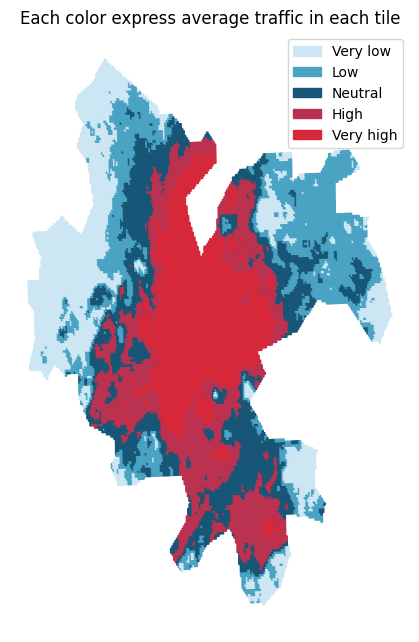

In [46]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

plt.title('Each color express average traffic in each tile')

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    if row['avg_traffic'] > g4:
        ax.fill(*polygon.exterior.xy, color=colors[4])
    elif row['avg_traffic'] > g3:
        ax.fill(*polygon.exterior.xy, color=colors[3])
    elif row['avg_traffic'] > g2:
        ax.fill(*polygon.exterior.xy, color=colors[2])
    elif row['avg_traffic'] > g1:
        ax.fill(*polygon.exterior.xy, color=colors[1])
    else:
        ax.fill(*polygon.exterior.xy, color=colors[0])


plt.autoscale(True)
plt.axis('off')
patch1 = mpatches.Patch(color='#CCE6F4', label='Very low')
patch2 = mpatches.Patch(color='#4BA3C3', label='Low')
patch3 = mpatches.Patch(color='#175676', label='Neutral')
patch4 = mpatches.Patch(color='#BA324F', label='High')
patch5 = mpatches.Patch(color='#D62839', label='Very high')

plt.legend(handles=[patch1, patch2,patch3,patch4,patch5])

plt.show()

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


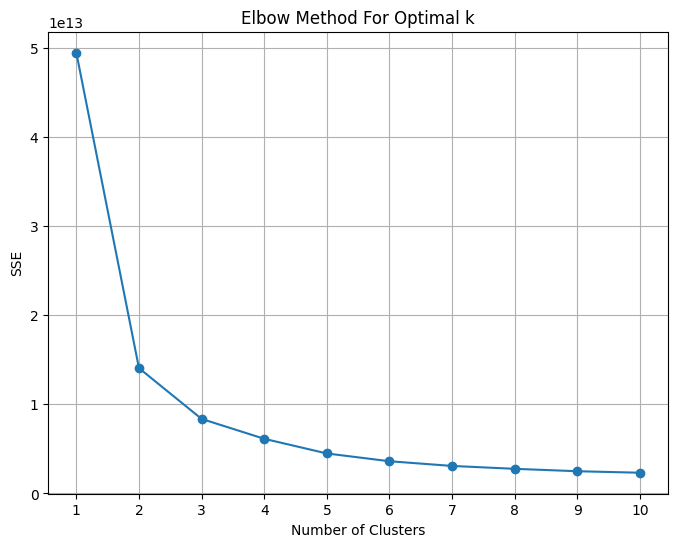

In [47]:
df_int = merged_with_shapes.select_dtypes(include='int64').dropna()
df_float = merged_with_shapes.select_dtypes(include='float64').dropna()

result = pd.merge(left=df_int, right=df_float, left_index=True, right_index=True)

def find_optimal_clusters(data, max_k):
    iters = range(1, max_k + 1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print(f'Fit {k} clusters')

    plt.figure(figsize=(8, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.xticks(iters)
    plt.grid(True)
    plt.show()


find_optimal_clusters(result, 10)

In [48]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(result)
merged_with_shapes['Segmentation'] = kmeans.labels_

(np.float64(0.019877963031669256),
 np.float64(0.3817383511888313),
 np.float64(47.883858430126175),
 np.float64(48.10659195625816))

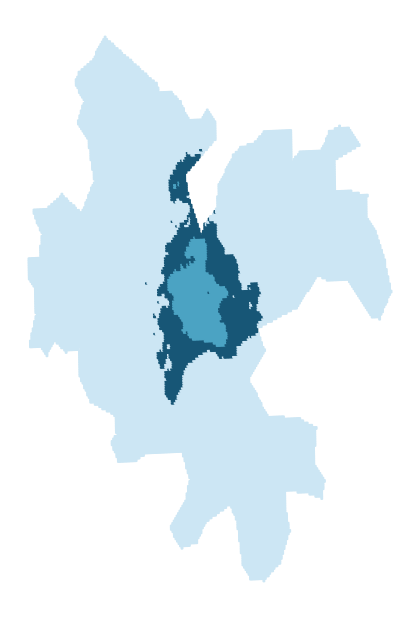

In [49]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    ax.fill(*polygon.exterior.xy, color=colors[row['Segmentation']])


plt.autoscale(True)
plt.axis('off')



# Get day's average traffic per hour

In [50]:
def aggregate_columns(df, agg_func=np.sum):
    n = 4
    new_columns = []

    for i in range(0, df.shape[1], n):
        cols = df.iloc[:, i:i+n]
        new_col = cols.apply(agg_func, axis=1)
        start_time = cols.columns[0][:2]
        end_time = cols.columns[min(n-1, len(cols.columns)-1)][:2]
        new_col_name = f"{start_time}:00 - {end_time}:45"
        new_columns.append(new_col.rename(new_col_name))

    return pd.concat(new_columns, axis=1)

In [51]:
aggregated_data = {}

In [52]:
for day in days_names:
    file_path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/{day}/{day}.csv'
    df = pd.read_csv(file_path)
    if 'tile_id' in df.columns:
        df.drop('tile_id', axis = 1 , inplace=True)
    
    df_aggregated = aggregate_columns(df, agg_func=np.sum)
    aggregated_data[day] = df_aggregated

In [53]:
aggregated_data_mean = {}

In [54]:
for day in days_names:
    df = aggregated_data[day]
    mean_values = df.mean(axis=0)
    mean_df = pd.DataFrame(mean_values).transpose()
    aggregated_data_mean[day] = mean_df

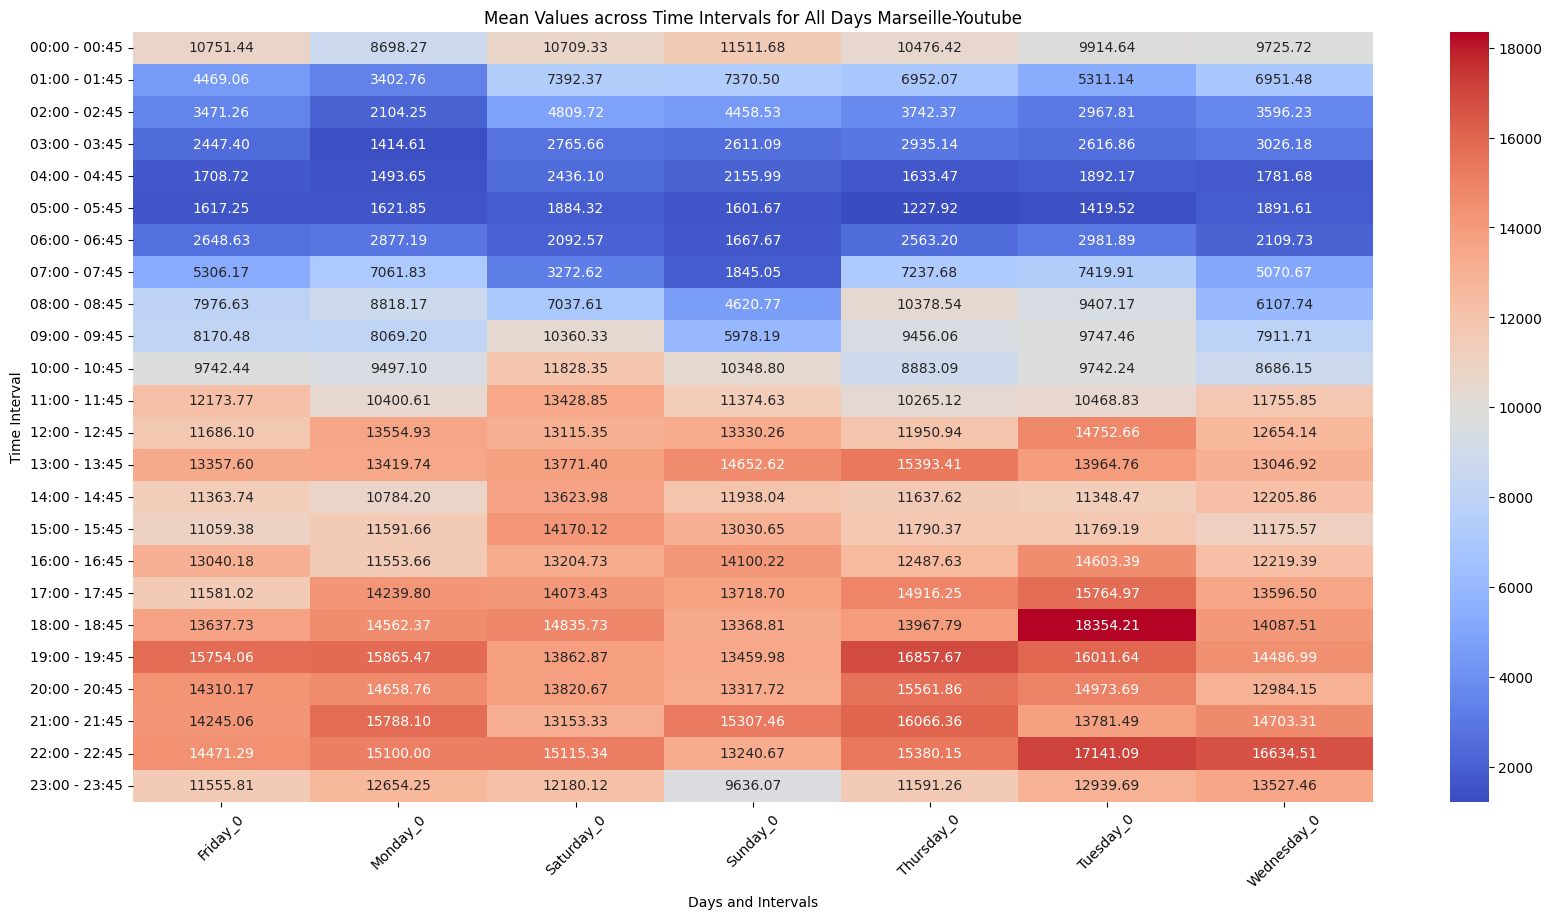

In [55]:
frames = []

for day in days_names:
    mean_df = aggregated_data_mean[day].transpose()
    mean_df.columns = [day + '_' + str(col) for col in mean_df.columns] 
    frames.append(mean_df)

combined_df = pd.concat(frames, axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Mean Values across Time Intervals for All Days Marseille-Youtube')
plt.ylabel('Time Interval')
plt.xlabel('Days and Intervals')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [66]:
import pandas as pd

mean_values = combined_df.mean(axis=0).to_frame(name='Mean Value')
mean_values.index.name = 'Day'

print("Mean Values Across Time Intervals for All Days - Mans-Youtube\n")
print(mean_values)

Mean Values Across Time Intervals for All Days - Mans-Youtube

               Mean Value
Day                      
Friday_0      9439.391341
Monday_0      9551.350840
Saturday_0   10122.704158
Sunday_0      9360.240500
Thursday_0   10139.682883
Tuesday_0    10387.287640
Wednesday_0   9580.709775


# Matrix Representation

In [57]:
# fetch the number of rows and columns of the city
n_rows, n_cols = city_dims[city_str]

# create a 3D array to store the traffic values
# the first dimension is the time, the second and third are the rows and columns (spatial dimensions)
city_traffic = np.zeros((len(times_str), n_rows, n_cols))

# fill the array with the traffic values
for _, row in df_day.iterrows():
    tile_id = row['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)

    traffic_values = np.array(row[times_str])
    city_traffic[:, row_index, col_index] = traffic_values

# Traffic Map

In [58]:
cmap_traffic = cm.get_cmap('Spectral_r').copy()
cmap_traffic.set_under('w', 0)
norm_traffic = colrs.LogNorm(vmin=1e0, vmax=1e7)

# let's plot the traffic map of the city for the first 15 min of each hour
fig, axs = plt.subplots(4, 6, figsize=(60, 40))
axs = axs.flatten()

for hour in range(24):
    ax = axs[hour]

    #recall that we have 15 min intervals, so we need to multiply the hour by 4
    city_traffic_time = city_traffic[ hour * 4 ] 

    ax.imshow(city_traffic_time, origin='lower', cmap=cmap_traffic, norm=norm_traffic)
    ax.set_title(f'{str(hour).zfill(2)}:00', fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ax = fig.add_axes([0.95, 0.25, 0.02, .5])
sm = plt.cm.ScalarMappable(cmap=cmap_traffic, norm=norm_traffic)
sm.set_array([])
clb = plt.colorbar(sm, cax=ax, orientation='vertical') 
clb.set_label('Traffic DN', rotation=90, fontsize=40, labelpad=50)
clb.ax.tick_params(labelsize=30)
clb.ax.xaxis.set_ticks_position('default')

plt.show()

/var/folders/19/85js5jqn52q28jzy8r3bk3tr0000gn/T/ipykernel_11418/780326874.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_traffic = cm.get_cmap('Spectral_r').copy()


# Total traffic time series

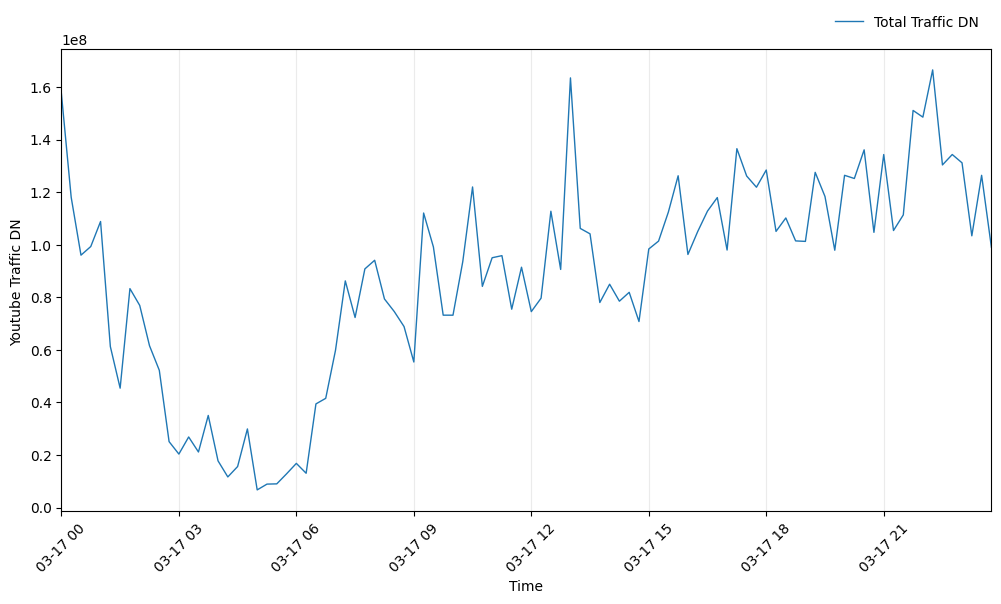

In [59]:
traffic_time_series = city_traffic.sum(axis=(1, 2))

fig = plt.figure(figsize=(12, 6))
plt.plot(times, traffic_time_series, linewidth=1, color='tab:blue', label='Total Traffic DN')
plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=1,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()

# Traffic time series for specific tile

Selected non-zero tiles: [(np.int64(125), np.int64(132)), (np.int64(59), np.int64(125)), (np.int64(145), np.int64(179)), (np.int64(49), np.int64(170))]


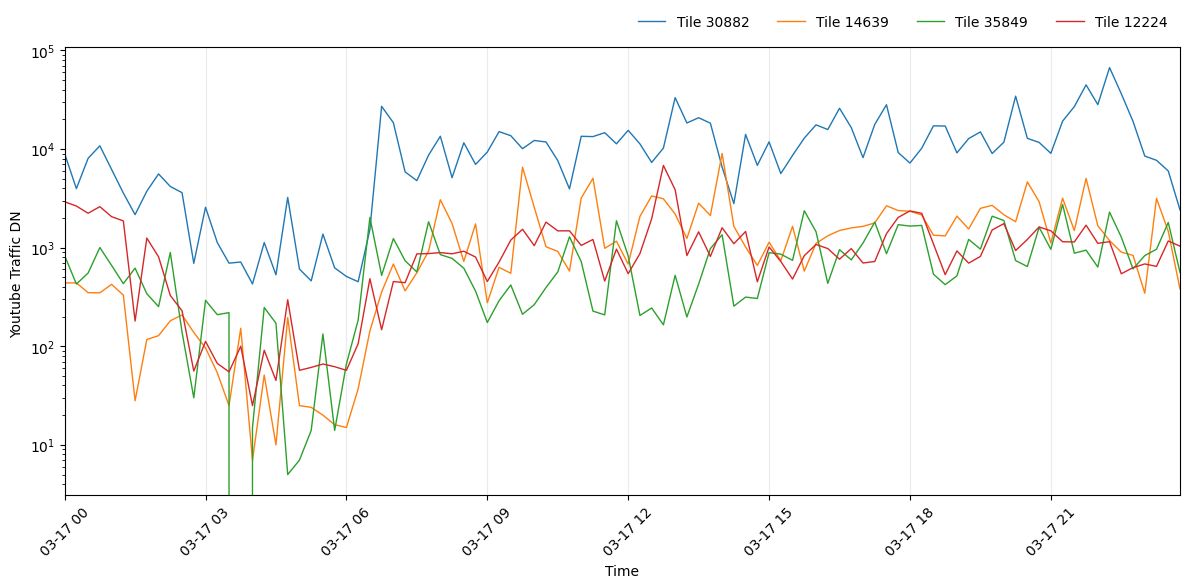

In [60]:
# Find all tile positions with any non-zero traffic
non_zero_tiles = np.argwhere(np.any(city_traffic > 0, axis=0))

# Pick a few random ones
np.random.seed(42)
random_indices = np.random.choice(len(non_zero_tiles), size=4, replace=False)
random_tiles = [tuple(non_zero_tiles[i]) for i in random_indices]

print("Selected non-zero tiles:", random_tiles)


plt.figure(figsize=(12, 6))

for random_tile in random_tiles:
    row, col = random_tile
    traffic_tile = city_traffic[:, row, col]
    
    if np.all(traffic_tile == 0):
        print(f"Tile ({row}, {col}) has all-zero traffic — skipping.")
        continue

    tile_id = row * n_cols + col
    plt.plot(times, traffic_tile, linewidth=1, label=f'Tile {tile_id}')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=4,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.yscale('log')
plt.tight_layout()
plt.show()


# Avoid tiles outside Mans

In [61]:
# let's load the geojson file of the city
city_geojson_file = f'./dataset/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

# showing one of the features
city_geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[0.24890485220422026, 47.89398268131399],
    [0.24886932675779921, 47.894881678568],
    [0.25020607753228485, 47.8949055630573],
    [0.2502415802605459, 47.89400656540794],
    [0.24890485220422026, 47.89398268131399]]]},
 'properties': {'tile_id': 156}}

In [62]:
# we can use the tile_id to find the row and column index of the tile
# and most important only valid tiles are present in the geojson file
tile_id = city_geojson['features'][0]['properties']['tile_id']

row_index = int(tile_id // n_cols)
col_index = int(tile_id % n_cols)
print(f'row_index: {row_index}, col_index: {col_index}')

row_index: 0, col_index: 156


In [63]:
# let's create a mask of the city, where the value 1 indicates a valid tile and 0 an invalid tile
city_mask = np.zeros((n_rows, n_cols))

for feature in city_geojson['features']:
    tile_id = feature['properties']['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)
    city_mask[row_index, col_index] = 1

# Plot the mask

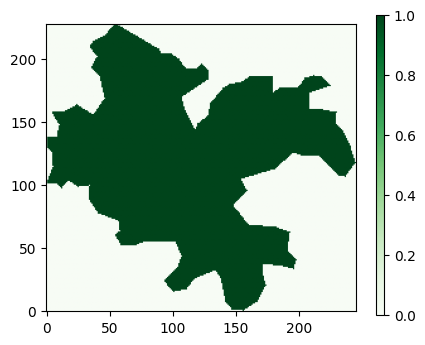

In [64]:
fig = plt.figure(figsize=(4, 6))
plt.imshow(city_mask, origin='lower', cmap='Greens')

cax = fig.add_axes([0.95, 0.25, 0.02, .5])
plt.colorbar(cax=cax)

plt.show()

# Mean and Median traffic

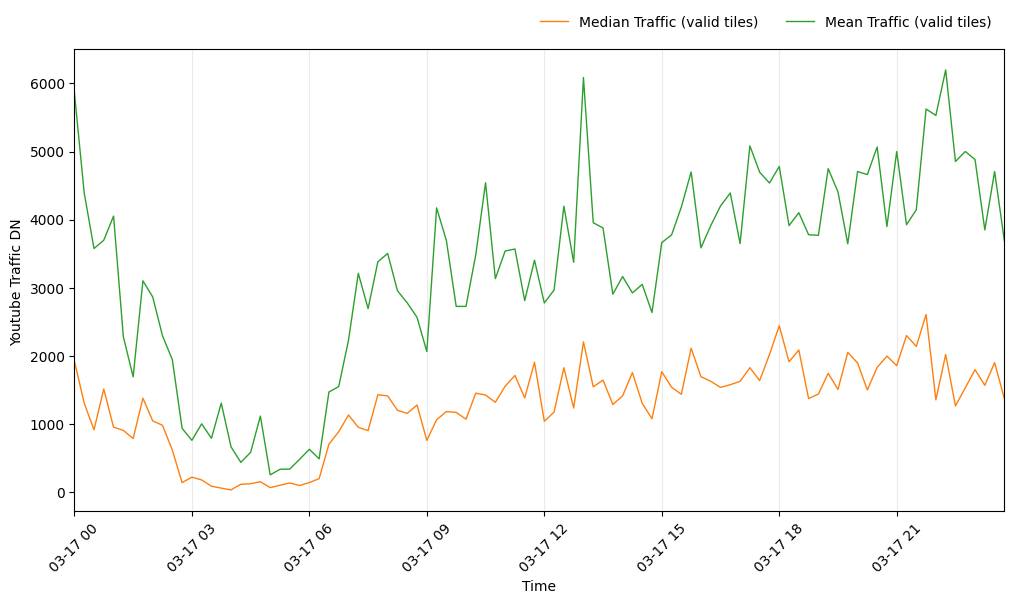

In [65]:
median_traffic = [np.median(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]
mean_traffic = [np.mean(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]

fig = plt.figure(figsize=(12, 6))
plt.plot(times, median_traffic, linewidth=1, color='tab:orange', label='Median Traffic (valid tiles)')
plt.plot(times, mean_traffic, linewidth=1, color='tab:green', label='Mean Traffic (valid tiles)')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=3,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()